In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
play = pd.read_csv('Playstore.csv', sep=",", encoding="ISO-8859-1", header=0, low_memory=False)
play.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560.0,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778.0,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739.0,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067.0,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463.0,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [3]:
play.shape

(910837, 23)

In [4]:
list(play)

['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last Updated',
 'Content Rating',
 'Privacy Policy',
 'Ad Supported',
 'In App Purchases',
 'Editors Choice']

In [5]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910837 entries, 0 to 910836
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           111392 non-null  object 
 1   App Id             111392 non-null  object 
 2   Category           111392 non-null  object 
 3   Rating             110209 non-null  float64
 4   Rating Count       110209 non-null  float64
 5   Installs           111312 non-null  object 
 6   Minimum Installs   111312 non-null  float64
 7   Maximum Installs   111392 non-null  float64
 8   Free               111392 non-null  object 
 9   Price              111392 non-null  float64
 10  Currency           111312 non-null  object 
 11  Size               111392 non-null  object 
 12  Minimum Android    111147 non-null  object 
 13  Developer Id       111392 non-null  object 
 14  Developer Website  90509 non-null   object 
 15  Developer Email    111387 non-null  object 
 16  Re

In [6]:
play.isnull().sum()

App Name             799445
App Id               799445
Category             799445
Rating               800628
Rating Count         800628
Installs             799525
Minimum Installs     799525
Maximum Installs     799445
Free                 799445
Price                799445
Currency             799525
Size                 799445
Minimum Android      799690
Developer Id         799445
Developer Website    820328
Developer Email      799450
Released             800793
Last Updated         799445
Content Rating       799445
Privacy Policy       812366
Ad Supported         799445
In App Purchases     799445
Editors Choice       799445
dtype: int64

In [7]:
play = play.dropna(axis=0)

In [8]:
play.shape

(80891, 23)

In [9]:
play.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560.0,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778.0,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739.0,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067.0,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463.0,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [10]:
play1 =play.drop_duplicates()
play1index_col=0

In [11]:
play1.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
count,80891,80891,80891,80891.000000,8.089100e+04,80891,8.089100e+04,8.089100e+04,80891,80891.000000,...,80891,80891,80891,80891,80891,80891,80891,80891,80891,80891
unique,80007,80891,48,NaN,NaN,22,NaN,NaN,2,NaN,...,19281,35457,29696,3826,2682,6,38082,2,2,2
top,Word Search,com.app.city.juegoCuentos.pinocho,Education,NaN,NaN,"10,000+",NaN,NaN,True,NaN,...,Amino Apps,http://aminoapps.com,android@foodsoul.pro,"May 21, 2019","Nov 23, 2020",Everyone,http://www.kikatech.com/privacy_en_kika_keyboa...,True,False,False
freq,17,1,7723,NaN,NaN,15308,NaN,NaN,75299,NaN,...,210,179,156,110,976,66827,276,43646,54935,80682
mean,NaN,NaN,NaN,3.480240,1.730795e+04,NaN,8.704888e+05,1.435504e+06,NaN,0.338592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.603492,3.817947e+05,NaN,4.018716e+07,4.854458e+07,NaN,3.139061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.400000,1.300000e+01,NaN,1.000000e+03,1.766500e+03,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.100000,1.230000e+02,NaN,1.000000e+04,1.788700e+04,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.500000,1.321500e+03,NaN,1.000000e+05,1.707660e+05,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import datetime as dt
play1['Released'] = pd.to_datetime(play1['Released']).dt.strftime('%Y-%m-%d')
play1['Last Updated'] = pd.to_datetime(play1['Last Updated']).dt.strftime('%Y-%m-%d')

In [13]:
play1

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560.0,True,0.00,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,2013-08-12,2017-05-20,Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778.0,True,0.00,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,2018-07-19,2020-11-26,Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739.0,True,0.00,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,2016-03-07,2020-10-21,Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067.0,True,0.00,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,2011-12-22,2020-11-23,Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463.0,True,0.00,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,2016-09-24,2020-11-22,Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111382,ØªØ¹ÙÙÙ Ø§ÙÙØºØ© Ø§ÙØ§ÙØ¬ÙÙØ²ÙØ©,mawuoodacademy.englishforall,Education,4.3,14902.0,"1,000,000+",1000000.0,1801053.0,True,0.00,...,Mawuood Academy,http://learnenglish.nu/,youme9957@yahoo.com,2012-09-12,2013-11-01,Everyone,http://mawuoodacademy.org/privacy-policy/index...,True,False,False
111383,Writing Challenge,com.literautas.writingchallenge,Productivity,4.4,201.0,"5,000+",5000.0,7393.0,False,1.49,...,Liternauts,http://www.liternauts.com/,support@literautas.com,2013-06-25,2015-06-11,Everyone,http://www.liternauts.com/apps-privacy-policy/,False,False,False
111384,Amino Community Manager - ACM,com.narvii.amino.manager,Social,4.1,42862.0,"1,000,000+",1000000.0,3555657.0,True,0.00,...,Amino Apps,http://www.aminoapps.com,support@aminoapps.com,2016-06-29,2020-10-29,Teen,http://www.narvii.com/privacy,False,False,False
111385,Harmonizers Amino para Fifth Harmony en EspaÃ±ol,com.narvii.amino.x198396773,Social,4.9,427.0,"5,000+",5000.0,6147.0,True,0.00,...,Amino Apps,http://aminoapps.com,ayuda@aminoapps.com,2017-02-21,2019-12-13,Teen,http://narvii.com/privacy,False,False,False


In [14]:
play1.drop(['App Id','Developer Email','Developer Website','Privacy Policy','Size'], axis = 1)
play1

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560.0,True,0.00,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,2013-08-12,2017-05-20,Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778.0,True,0.00,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,2018-07-19,2020-11-26,Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739.0,True,0.00,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,2016-03-07,2020-10-21,Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067.0,True,0.00,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,2011-12-22,2020-11-23,Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463.0,True,0.00,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,2016-09-24,2020-11-22,Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111382,ØªØ¹ÙÙÙ Ø§ÙÙØºØ© Ø§ÙØ§ÙØ¬ÙÙØ²ÙØ©,mawuoodacademy.englishforall,Education,4.3,14902.0,"1,000,000+",1000000.0,1801053.0,True,0.00,...,Mawuood Academy,http://learnenglish.nu/,youme9957@yahoo.com,2012-09-12,2013-11-01,Everyone,http://mawuoodacademy.org/privacy-policy/index...,True,False,False
111383,Writing Challenge,com.literautas.writingchallenge,Productivity,4.4,201.0,"5,000+",5000.0,7393.0,False,1.49,...,Liternauts,http://www.liternauts.com/,support@literautas.com,2013-06-25,2015-06-11,Everyone,http://www.liternauts.com/apps-privacy-policy/,False,False,False
111384,Amino Community Manager - ACM,com.narvii.amino.manager,Social,4.1,42862.0,"1,000,000+",1000000.0,3555657.0,True,0.00,...,Amino Apps,http://www.aminoapps.com,support@aminoapps.com,2016-06-29,2020-10-29,Teen,http://www.narvii.com/privacy,False,False,False
111385,Harmonizers Amino para Fifth Harmony en EspaÃ±ol,com.narvii.amino.x198396773,Social,4.9,427.0,"5,000+",5000.0,6147.0,True,0.00,...,Amino Apps,http://aminoapps.com,ayuda@aminoapps.com,2017-02-21,2019-12-13,Teen,http://narvii.com/privacy,False,False,False


In [15]:
play1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80891 entries, 0 to 111386
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           80891 non-null  object 
 1   App Id             80891 non-null  object 
 2   Category           80891 non-null  object 
 3   Rating             80891 non-null  float64
 4   Rating Count       80891 non-null  float64
 5   Installs           80891 non-null  object 
 6   Minimum Installs   80891 non-null  float64
 7   Maximum Installs   80891 non-null  float64
 8   Free               80891 non-null  object 
 9   Price              80891 non-null  float64
 10  Currency           80891 non-null  object 
 11  Size               80891 non-null  object 
 12  Minimum Android    80891 non-null  object 
 13  Developer Id       80891 non-null  object 
 14  Developer Website  80891 non-null  object 
 15  Developer Email    80891 non-null  object 
 16  Released           80

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

play1['Free']= le.fit_transform(play1['Free'])
play1['Developer Id']= le.fit_transform(play1['Developer Id'])
play1['App Name']= le.fit_transform(play1['App Name'])
play1['Category']= le.fit_transform(play1['Category'])
play1['Installs']= le.fit_transform(play1['Installs'])
play1['Content Rating']= le.fit_transform(play1['Content Rating'])
play1['Ad Supported']= le.fit_transform(play1['Ad Supported'])
play1['In App Purchases']= le.fit_transform(play1['In App Purchases'])
play1['Minimum Android']= le.fit_transform(play1['Minimum Android'])
play1['Editors Choice']= le.fit_transform(play1['Editors Choice'])
play1['Currency']= le.fit_transform(play1['Currency'])

In [17]:
play1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80891 entries, 0 to 111386
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           80891 non-null  int32  
 1   App Id             80891 non-null  object 
 2   Category           80891 non-null  int32  
 3   Rating             80891 non-null  float64
 4   Rating Count       80891 non-null  float64
 5   Installs           80891 non-null  int32  
 6   Minimum Installs   80891 non-null  float64
 7   Maximum Installs   80891 non-null  float64
 8   Free               80891 non-null  int32  
 9   Price              80891 non-null  float64
 10  Currency           80891 non-null  int32  
 11  Size               80891 non-null  object 
 12  Minimum Android    80891 non-null  int32  
 13  Developer Id       80891 non-null  int32  
 14  Developer Website  80891 non-null  object 
 15  Developer Email    80891 non-null  object 
 16  Released           80

In [18]:
play1['Released']  = pd.to_datetime(play1['Released'])
play1['Last Updated']  = pd.to_datetime(play1['Last Updated'])

In [19]:
play1["Released"]= play1["Released"].values.astype(float)
play1["Last Updated"]= play1["Last Updated"].values.astype(float)

In [20]:
play1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80891 entries, 0 to 111386
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           80891 non-null  int32  
 1   App Id             80891 non-null  object 
 2   Category           80891 non-null  int32  
 3   Rating             80891 non-null  float64
 4   Rating Count       80891 non-null  float64
 5   Installs           80891 non-null  int32  
 6   Minimum Installs   80891 non-null  float64
 7   Maximum Installs   80891 non-null  float64
 8   Free               80891 non-null  int32  
 9   Price              80891 non-null  float64
 10  Currency           80891 non-null  int32  
 11  Size               80891 non-null  object 
 12  Minimum Android    80891 non-null  int32  
 13  Developer Id       80891 non-null  int32  
 14  Developer Website  80891 non-null  object 
 15  Developer Email    80891 non-null  object 
 16  Released           80

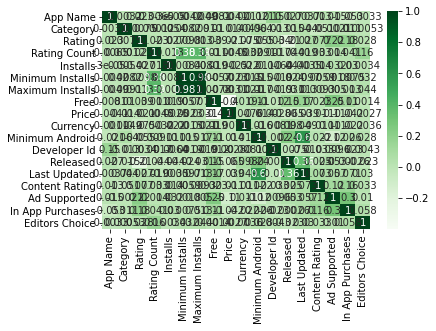

In [21]:
corrMatrix = play1.corr()
sns.heatmap(corrMatrix, annot=True, cmap="Greens")
plt.rcParams["figure.figsize"] = (34,34)
plt.show()

In [22]:
list(play1)

['App Name',
 'App Id',
 'Category',
 'Rating',
 'Rating Count',
 'Installs',
 'Minimum Installs',
 'Maximum Installs',
 'Free',
 'Price',
 'Currency',
 'Size',
 'Minimum Android',
 'Developer Id',
 'Developer Website',
 'Developer Email',
 'Released',
 'Last Updated',
 'Content Rating',
 'Privacy Policy',
 'Ad Supported',
 'In App Purchases',
 'Editors Choice']

In [23]:
play1

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,27034,com.httrack.android,13,3.6,2848.0,10,100000.0,351560.0,1,0.00,...,17428,http://www.httrack.com/,roche+android@httrack.com,1.376266e+18,1.495238e+18,1,http://android.httrack.com/privacy-policy.html,0,0,0
1,69557,com.skizze.wwii,41,4.3,17297.0,3,1000000.0,2161778.0,1,0.00,...,14193,http://stereo7.com/,Skizze.Games@gmail.com,1.531958e+18,1.606349e+18,2,https://www.iubenda.com/privacy-policy/8032781,1,1,0
2,67499,com.themausoft.wpsapp,42,4.2,488639.0,18,50000000.0,79304739.0,1,0.00,...,15733,http://www.themausoft.com,wpsapp.app@gmail.com,1.457309e+18,1.603238e+18,1,https://sites.google.com/view/wpsapppolicy/main,1,0,0
3,44374,com.mobisystems.office,8,4.2,1224420.0,11,100000000.0,163660067.0,1,0.00,...,10178,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,1.324512e+18,1.606090e+18,1,http://www.mobisystems.com/mobile/privacy-poli...,1,1,0
4,36499,com.arthelion.loudplayer,28,4.2,665.0,17,50000.0,73463.0,1,0.00,...,1426,http://www.arthelion.com,arthelion92@gmail.com,1.474675e+18,1.606003e+18,1,http://www.arthelion.com/index.php/fr/android-...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111382,75974,mawuoodacademy.englishforall,15,4.3,14902.0,3,1000000.0,1801053.0,1,0.00,...,9723,http://learnenglish.nu/,youme9957@yahoo.com,1.347408e+18,1.383264e+18,1,http://mawuoodacademy.org/privacy-policy/index...,1,0,0
111383,69698,com.literautas.writingchallenge,33,4.4,201.0,13,5000.0,7393.0,0,1.49,...,9012,http://www.liternauts.com/,support@literautas.com,1.372118e+18,1.433981e+18,1,http://www.liternauts.com/apps-privacy-policy/,0,0,0
111384,3445,com.narvii.amino.manager,39,4.1,42862.0,3,1000000.0,3555657.0,1,0.00,...,1010,http://www.aminoapps.com,support@aminoapps.com,1.467158e+18,1.603930e+18,4,http://www.narvii.com/privacy,0,0,0
111385,27537,com.narvii.amino.x198396773,39,4.9,427.0,13,5000.0,6147.0,1,0.00,...,1010,http://aminoapps.com,ayuda@aminoapps.com,1.487635e+18,1.576195e+18,4,http://narvii.com/privacy,0,0,0


In [24]:

X = play1[['Rating Count','Installs','Maximum Installs','Free','Price','Currency','Developer Id','Released','Last Updated','Content Rating','Ad Supported','In App Purchases','Editors Choice']]
y = play1[['Rating']]

### Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(64712, 13) (16179, 13) (64712, 1) (16179, 1)


In [26]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
ylin_pred = lin.predict(X_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ylin_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ylin_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ylin_pred)))
print('R2 score:',metrics.r2_score(y_test, ylin_pred))

Mean Absolute Error: 1.1927151296695764
Mean Squared Error: 2.41300967785878
Root Mean Squared Error: 1.5533865191441505
R2 score: 0.05798500416871433


#### Random Forest

In [27]:
model = RandomForestRegressor(n_estimators = 10, random_state = 1)
model.fit(X_train, y_train.values.ravel())
predicted = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predicted)))
print('R2 score:',metrics.r2_score(y_test, predicted))

Mean Absolute Error: 0.34227455343346314
Mean Squared Error: 0.263829260152049
Root Mean Squared Error: 0.5136431252845199
R2 score: 0.8970036789811628


### Decision Tree

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
clr = DecisionTreeRegressor()

# Train Decision Tree Regressor
clr = clr.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT = clr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred_DT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_DT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT)))
print('R2 score:',metrics.r2_score(y_test, y_pred_DT))

Mean Absolute Error: 0.4450275047901601
Mean Squared Error: 0.4666561592187404
Root Mean Squared Error: 0.6831223603562837
R2 score: 0.8178220734401827
